# Advanced Hand Gesture Recognition System with Convolutional Neural Network (CNN)

### Importing Libraries

To build this Hand Gesture Recognition project, we’ll need the following packages. So first import these.

In [9]:
from keras.preprocessing. image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dropout 
from keras.layers import Dense 
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model 
import tensorflow as tf 
import numpy as np
import os
import matplotlib.pyplot as plt

Let's set Default Font Sizes for Matplotlib Plot Labels and Tick Marks

In [10]:
plt.rcParams ['axes.labelsize'] = 16
plt.rcParams ['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Loading the Dataset

Let's Apply Keras' ImageDataGenerator to Assign Labels to Dataset Directories and Perform Data Augmentation for Enhanced Training Data. This Approach Includes Shifting, Zooming, Rotation, and Mirroring Techniques to Increase Data Size and Avoid Bias towards a Specific Handedness.

In [11]:
nbatch = 32
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 12., 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    zoom_range = 0.15, 
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(
    '/Users/hsuryawa/Library/CloudStorage/OneDrive-CalPoly/Documents/Advanced Machine Learning/Data/images/train',
    target_size = (256, 256),
    color_mode = 'grayscale',
    batch_size = nbatch,
    classes = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'], 
    class_mode = 'categorical'
    
)


test_gen = test_datagen.flow_from_directory(
    '/Users/hsuryawa/Library/CloudStorage/OneDrive-CalPoly/Documents/Advanced Machine Learning/Data/images/test',
target_size = (256, 256), 
color_mode = 'grayscale',
batch_size = nbatch,
classes = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
class_mode = 'categorical'
)


Found 9081 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.


In this particular implementation, a batch size of 32 is employed, representing the number of data instances processed by the CNN model before calculating the loss and updating the weights and biases. By dividing the entire dataset into smaller batches, this approach facilitates more efficient and iterative training, allowing for manageable computations at each step.

Let's take a look at our training set.

(32, 256, 256, 1) (32, 6)


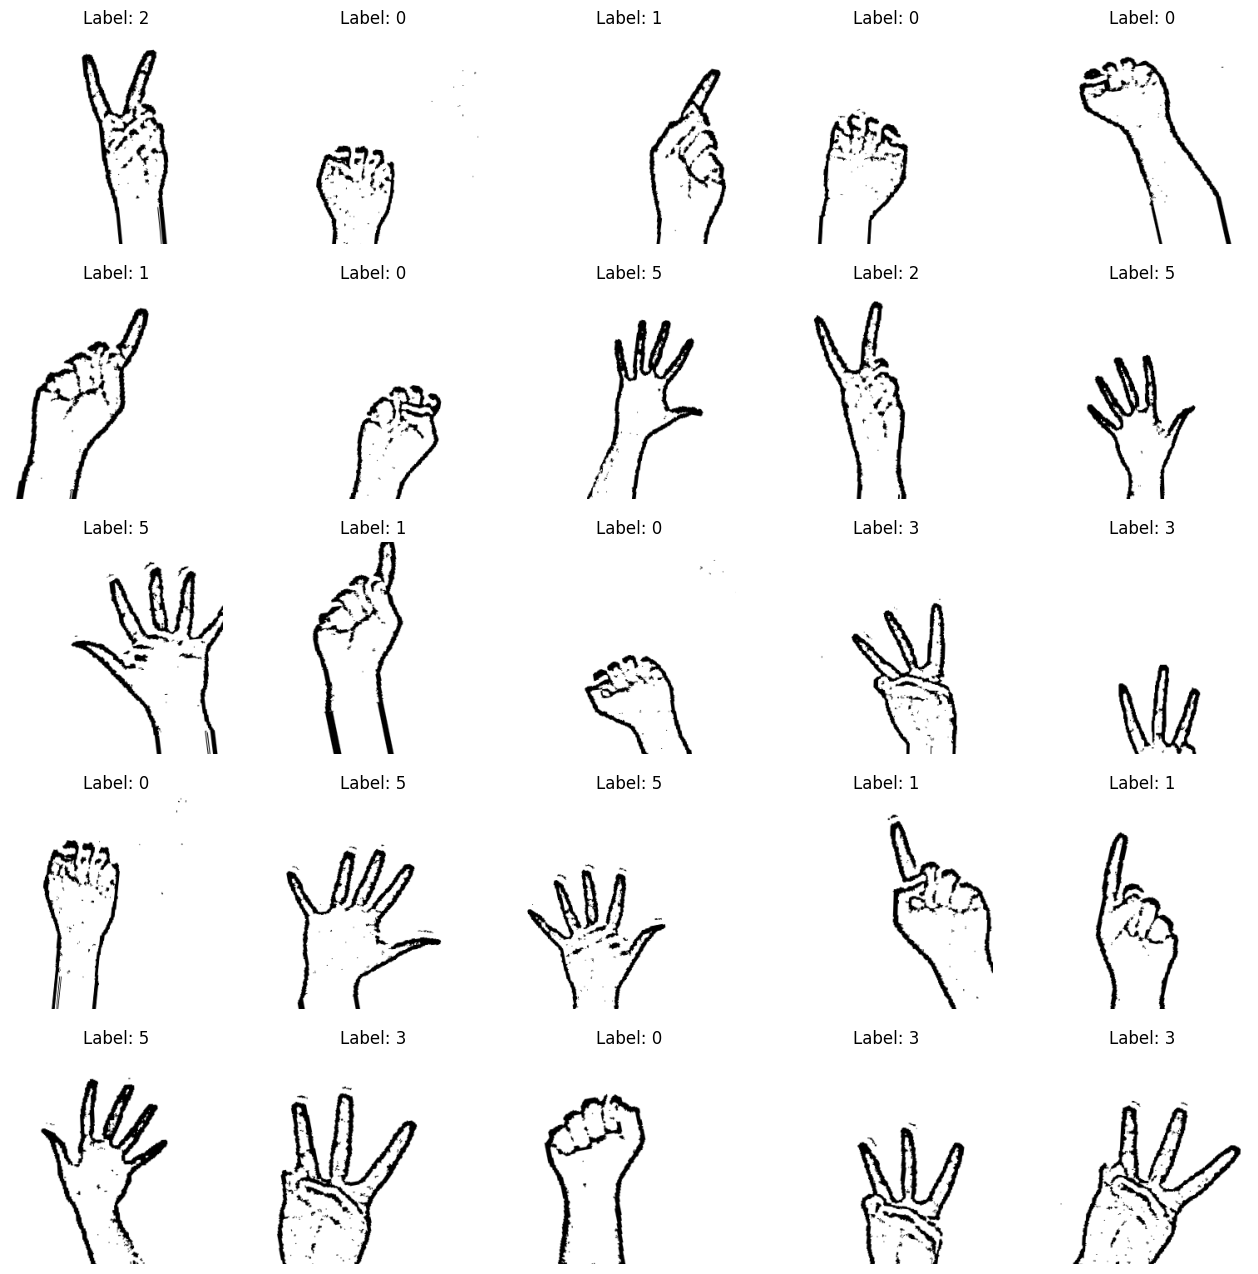

In [30]:
for X, y in train_gen:
    print(X.shape, y.shape)
    plt. figure(figsize= (16,16))
    for i in range (25):
        plt.subplot (5,5,i+1)
        plt.axis ('off')
        plt.title('Label: %d' % np.argmax (y[i]))
        img = np.uint8 (255*X[i, :,:,0])
        plt.imshow (img, cmap='gray')
    break

### Building CNN Model

The dataset is ready, now let’s build CNN architecture using Keras library.

In [13]:
model = Sequential ()
#Creates a sequential model, which is a linear stack of layers
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 1))) 
model.add(MaxPooling2D ( (2,2))) 
model.add(Conv2D(64, (3,3), activation = 'relu')) 
model.add(Conv2D(64, (3,3), activation = 'relu')) 
model.add(MaxPooling2D ((2,2))) 
model.add(Conv2D(128, (3,3), activation = 'relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Flatten()) 
model.add(Dense(150, activation = 'relu')) 
model.add(Dropout (0.25)) 
model.add(Dense(6, activation='softmax'))

#### Compiling the network

We will compile our model with the specified optimizer, loss function, and metrics, preparing it for training.

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

We will use callbacks to monitor the validation loss as well as to save the model

In [15]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model.h6', monitor='val_loss', save_best_only= True),
]

### Training the model

Now let's start training the model, my computer has GPU so it will be used. But even if not it can utilize CPU and train it.

In [25]:
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
with tf.device('/GPU:0'):
    history = model.fit_generator(
        train_gen,
        steps_per_epoch=64,
        epochs=10,
        validation_data=test_gen,
        validation_steps=28,
        callbacks=callbacks_list
    )

/var/folders/vw/zfyky8vs1_n6f0ftgxl16t_h0000gr/T/ipykernel_75548/2947709254.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


2023-06-14 11:10:03.274243: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


64/64 [==============================] - ETA: 0s - loss: 0.6728 - acc: 0.7168

2023-06-14 11:11:24.958680: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


64/64 [==============================] - 91s 1s/step - loss: 0.6728 - acc: 0.7168 - val_loss: 0.4333 - val_acc: 0.8114
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.4855 - acc: 0.8066INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


64/64 [==============================] - 94s 1s/step - loss: 0.4855 - acc: 0.8066 - val_loss: 0.3787 - val_acc: 0.8315
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.4662 - acc: 0.8184INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


64/64 [==============================] - 98s 2s/step - loss: 0.4662 - acc: 0.8184 - val_loss: 0.1684 - val_acc: 0.9498
Epoch 4/10
64/64 [==============================] - 97s 2s/step - loss: 0.3745 - acc: 0.8564 - val_loss: 0.1825 - val_acc: 0.9330
Epoch 5/10
64/64 [==============================] - ETA: 0s - loss: 0.3484 - acc: 0.8726INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


64/64 [==============================] - 95s 1s/step - loss: 0.3484 - acc: 0.8726 - val_loss: 0.1256 - val_acc: 0.9565
Epoch 6/10
64/64 [==============================] - 103s 2s/step - loss: 0.3128 - acc: 0.8691 - val_loss: 0.1986 - val_acc: 0.9330
Epoch 7/10
64/64 [==============================] - ETA: 0s - loss: 0.3089 - acc: 0.8863INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


INFO:tensorflow:Assets written to: model_6cat_2.h6/assets


64/64 [==============================] - 95s 1s/step - loss: 0.3089 - acc: 0.8863 - val_loss: 0.0690 - val_acc: 0.9821
Epoch 8/10
64/64 [==============================] - 94s 1s/step - loss: 0.2980 - acc: 0.8945 - val_loss: 0.0825 - val_acc: 0.9754
Epoch 9/10
64/64 [==============================] - 90s 1s/step - loss: 0.2829 - acc: 0.8965 - val_loss: 0.1219 - val_acc: 0.9587
Epoch 10/10
64/64 [==============================] - 89s 1s/step - loss: 0.2129 - acc: 0.9201 - val_loss: 0.1325 - val_acc: 0.9431


Training takes a lot of time. Increasing no. of epochs will increase the computational time but also increase the accuracy. My model took almost 15 mins to complete the training.

### Output

We can utilize the recorded history of the model training to create visualizations and gain insights into the training process. This allows us to plot and analyze various aspects of the model's performance over epochs, such as changes in loss and accuracy.

Text(0.5, 0, 'number of epochs')

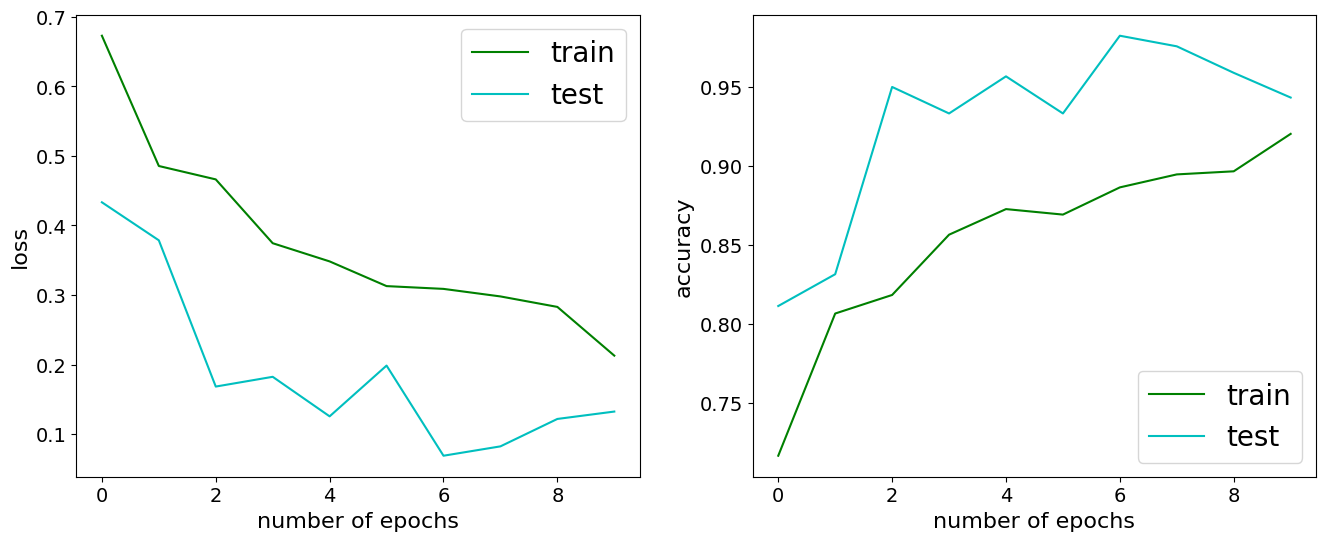

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs = len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'c-', label='test')
plt.legend(prop = {'size': 20})
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['acc'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'c-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('number of epochs')

### Testing the model

Next, we assess the performance of the trained model by evaluating it on an unseen dataset. This dataset, called test_gen, consists of images without labels. We pass these images through the model to obtain predictions. Subsequently, we compare these predictions to the ground truth values of y_test and calculate the model's accuracy based on this comparison. This process allows us to measure how well the model performs on the test dataset.

In [27]:
X_test, y_test = [], []
for ibatch, (X,y) in enumerate(test_gen):
    X_test.append(X)
    y_test.append(y)
    ibatch += 1
    if(ibatch == 5*28): break
    
# Concatenating everything
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])

# Get predictions from the model and calculate the accuracy
y_pred = np.int32([np.argmax(r) for r in model.predict(X_test)])
match = (y_test == y_pred)
print('Testing Accuracy = %.2f%%' % (np.sum(match) * 100 / match.shape[0]))

140/140 [==============================] - 46s 328ms/step
Testing Accuracy = 94.29%


Our model gave us an impressive accuracy of 94.29%

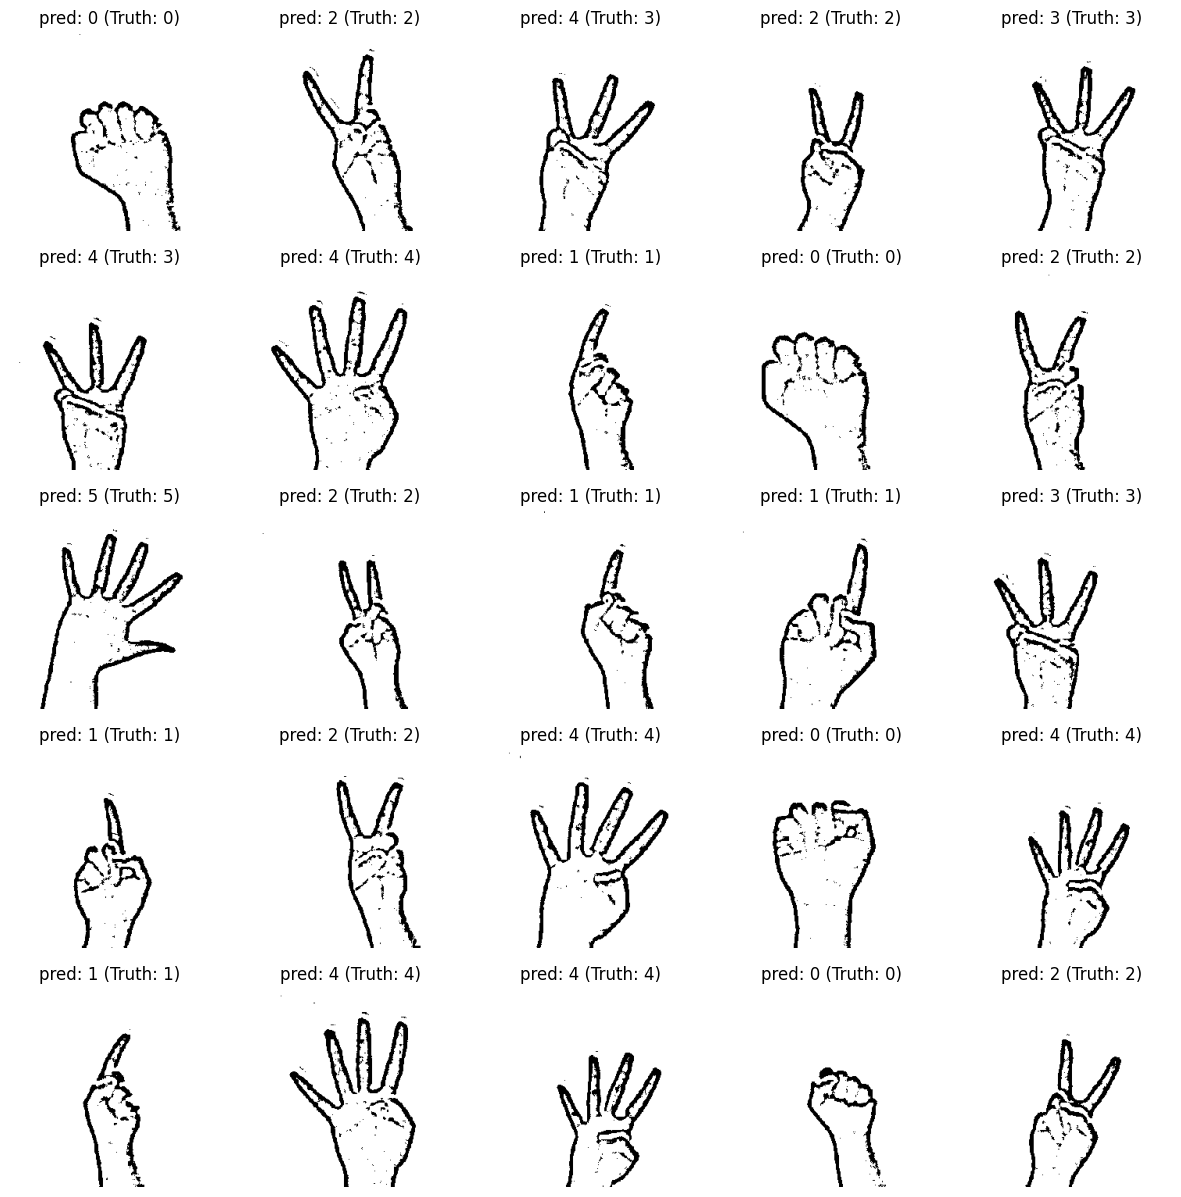

In [28]:
plt.figure(figsize=(15, 15))
for i in range(min(y_test.size, 25)):
    plt.subplot(5, 5, i + 1)
    plt.title('pred: %d (Truth: %d)' % (y_pred[i], y_test[i]))
    plt.axis('off')
    plt.imshow(X_test[i, :, :, 0], cmap='gray')


The image above displays the predicted class and true class for the model's predictions. It provides a visual representation of the correspondence between the predicted classes generated by the model and the actual classes of the data.

### Confusion Matrix

Let's look at the visual representation of the confusion matrix.

<Axes: >

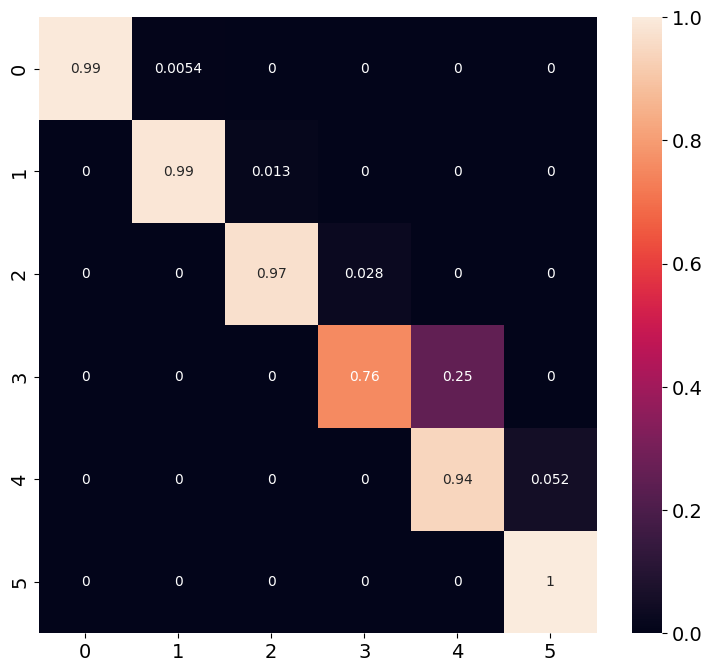

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(9,8))
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis = 1)
sns.heatmap(cm, annot = True)

### Conclusion

To conclude, we successfully created a CNN model which could classify Hand gesture and give us the count of fingers shown in the image. We started by loading a dataset and exploring it a bit. Then we built a CNN model using Keras. We also compiled our model using adam optimizer and categorical crossentropy loss function. Finally starting with the training we used 10 epochs with 64 steps each. AFter testing the performance of our CNN model it gave us an impressive accuracy of 94.29%. We also visualized the predicted images and they seemed to be pretty accurate. At the end we visualized the confusion matrix for our model and here we have successfully created a CNN model for hand gesture recognition.